**Credit card balance prediction**

<hr>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv("/content/Credit.csv")

In [ ]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [ ]:
df.nunique()

Unnamed: 0    400
Income        399
Limit         387
Rating        283
Cards           9
Age            68
Education      16
Gender          2
Student         2
Married         2
Ethnicity       3
Balance       284
dtype: int64

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Limit'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Cards'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Balance'}>, <Axes: >, <Axes: >]],
      dtype=object)

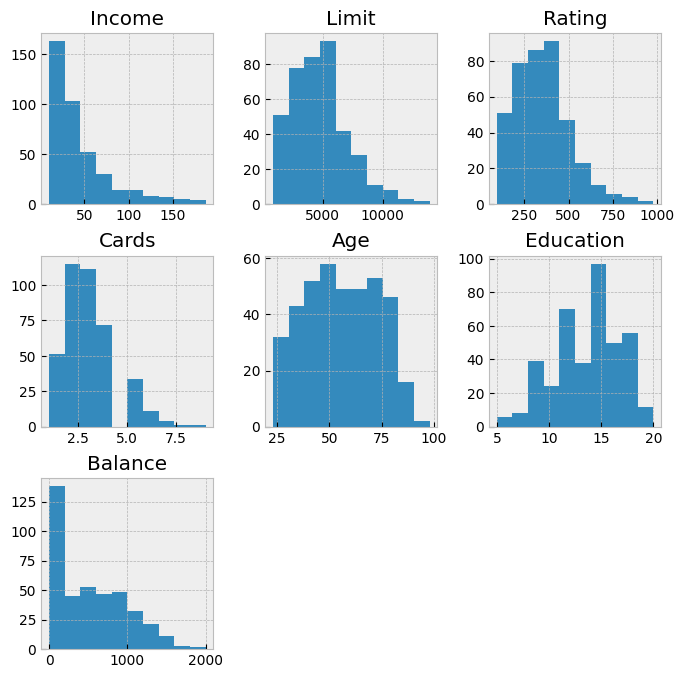

In [ ]:
df.hist(layout=(3,3),figsize=(8,8))

[Text(0.5, 1.0, 'Frequency of Student and Gender')]

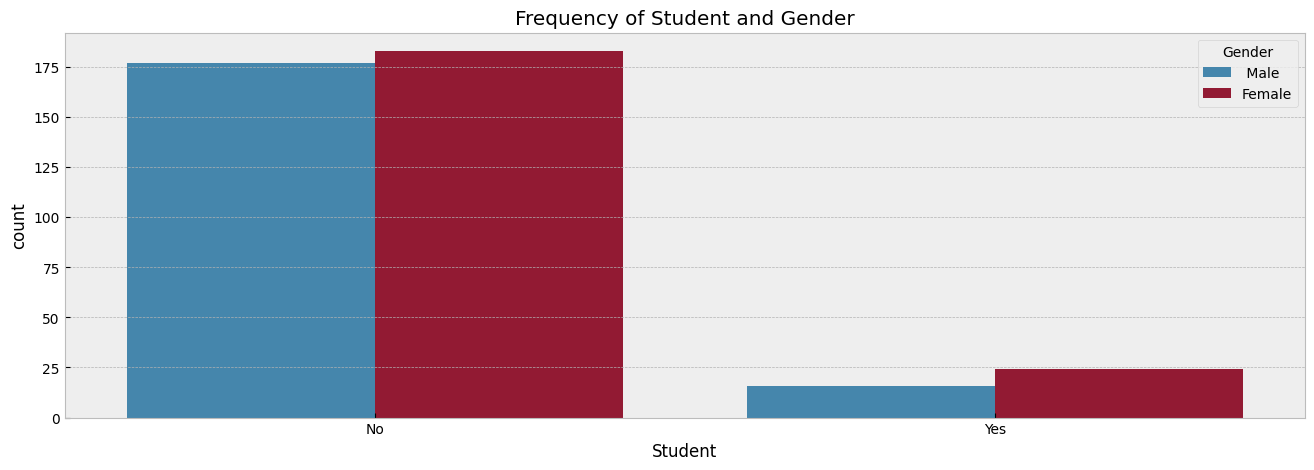

In [ ]:
sns.countplot(data=df, x="Student",hue="Gender").set(title = "Frequency of Student and Gender")

[Text(0.5, 1.0, 'Number of cards used')]

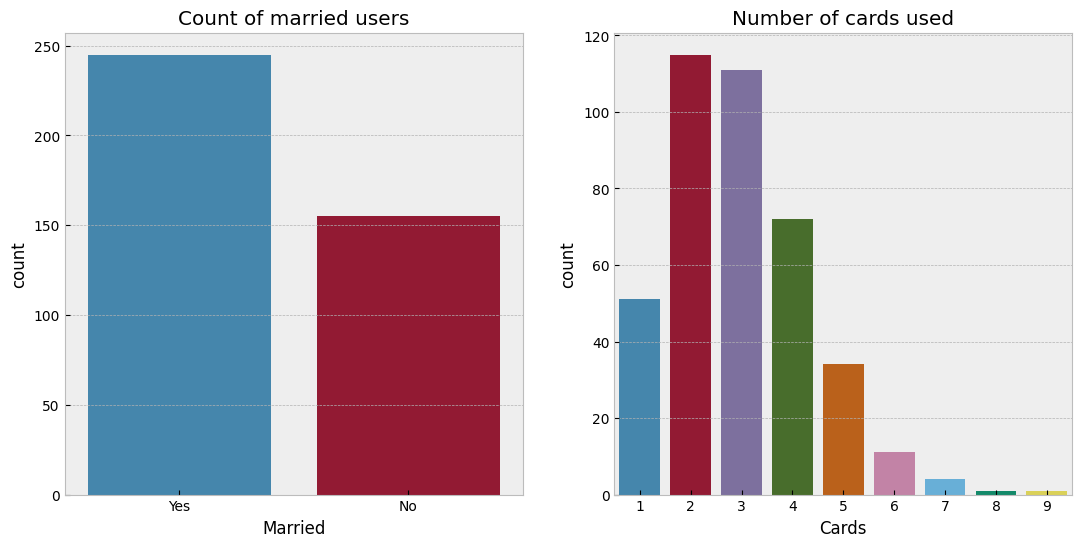

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (13,6))
#fig.tight_layout()

plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Married").set(title = "Count of married users")
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Cards").set(title="Number of cards used")



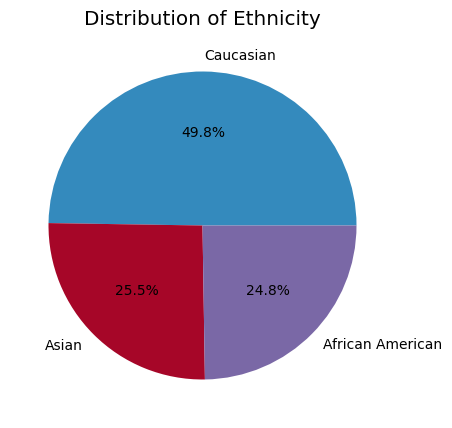

In [ ]:
plt.pie(df['Ethnicity'].value_counts(), labels=df['Ethnicity'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Ethnicity')
plt.show()

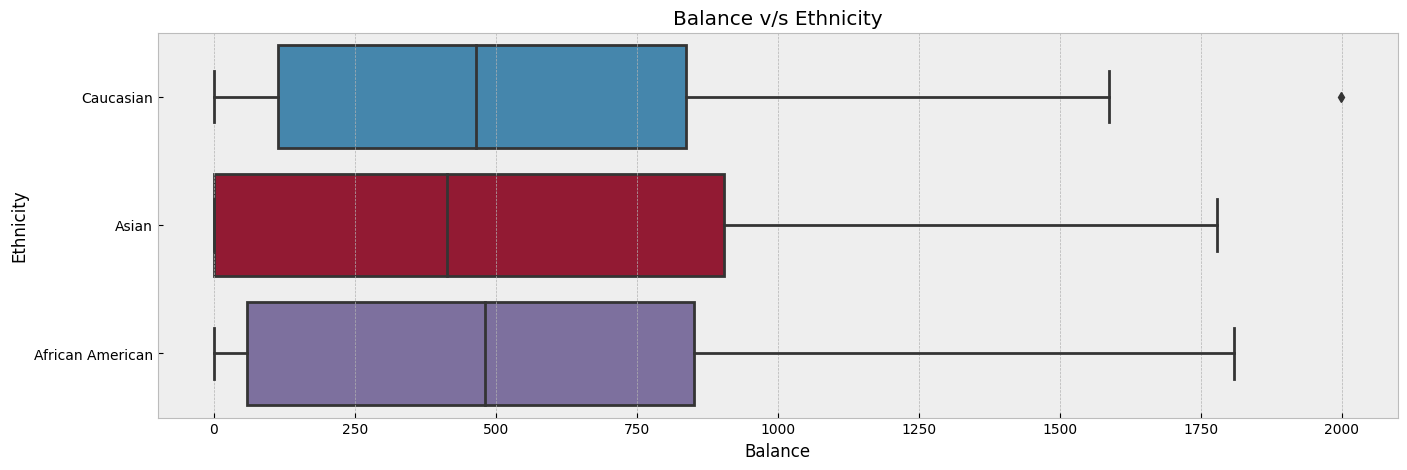

In [ ]:
sns.boxplot( x="Balance", y='Ethnicity', data=df, ).set(title='Balance v/s Ethnicity')
plt.show()


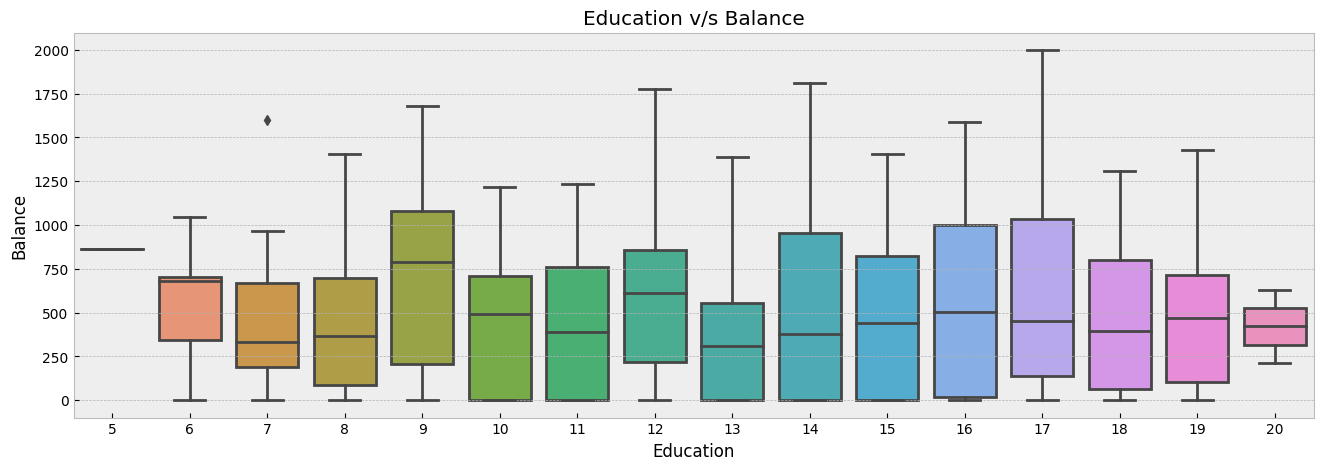

In [ ]:
sns.boxplot( x="Education", y='Balance', data=df).set(title='Education v/s Balance')
plt.show()

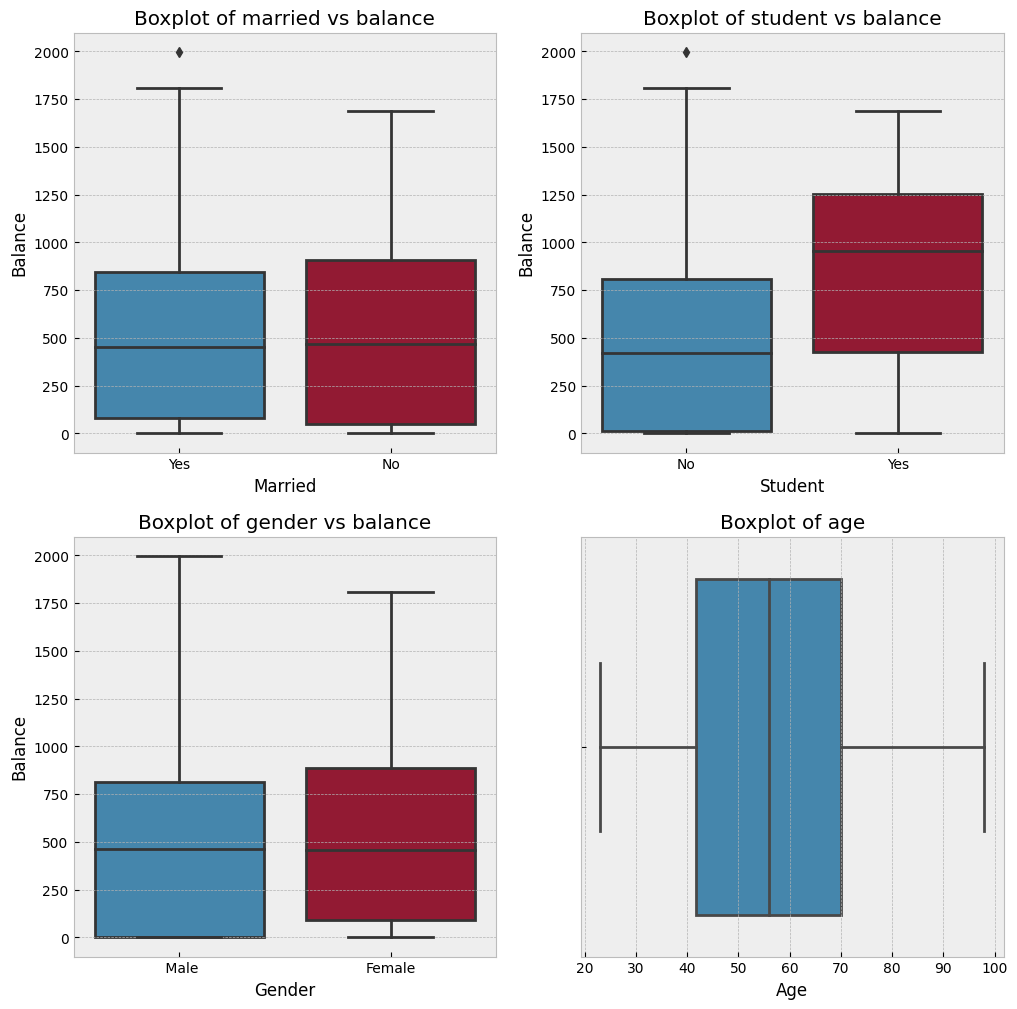

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (12,12))
#fig.tight_layout()

plt.subplot(2, 2, 1)
sns.boxplot( x="Married", y='Balance', data=df).set(title='Boxplot of married vs balance')
plt.subplot(2, 2, 2)
sns.boxplot( x="Student", y='Balance', data=df).set(title='Boxplot of student vs balance')
plt.subplot(2, 2, 3)
sns.boxplot( x="Gender", y='Balance', data=df ).set(title='Boxplot of gender vs balance')
plt.subplot(2, 2, 4)
sns.boxplot(x='Age', data=df).set(title='Boxplot of age')



plt.show()

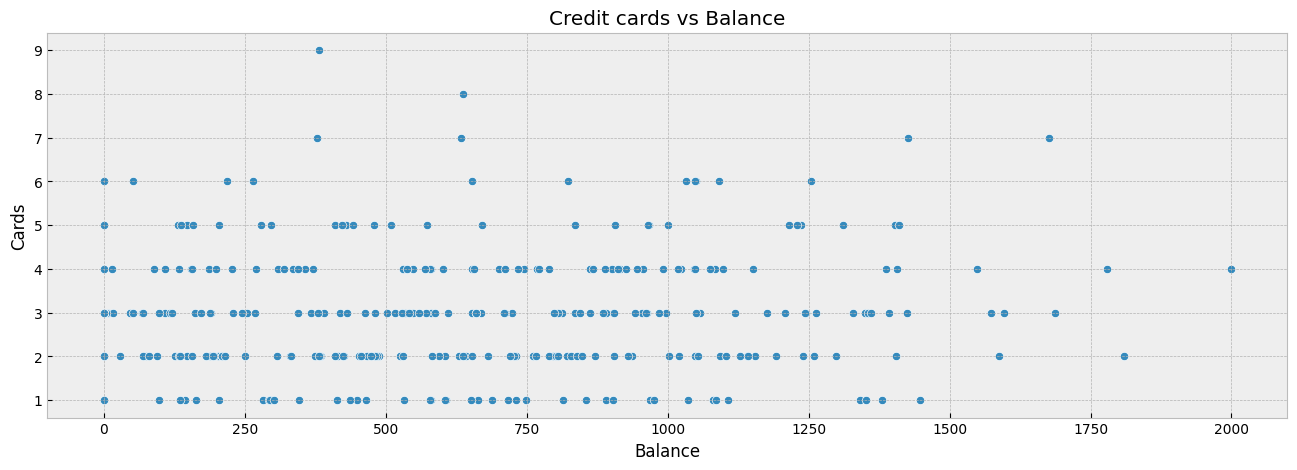

In [ ]:
sns.scatterplot( x="Balance", y='Cards', data=df).set(title="Credit cards vs Balance")
plt.show()

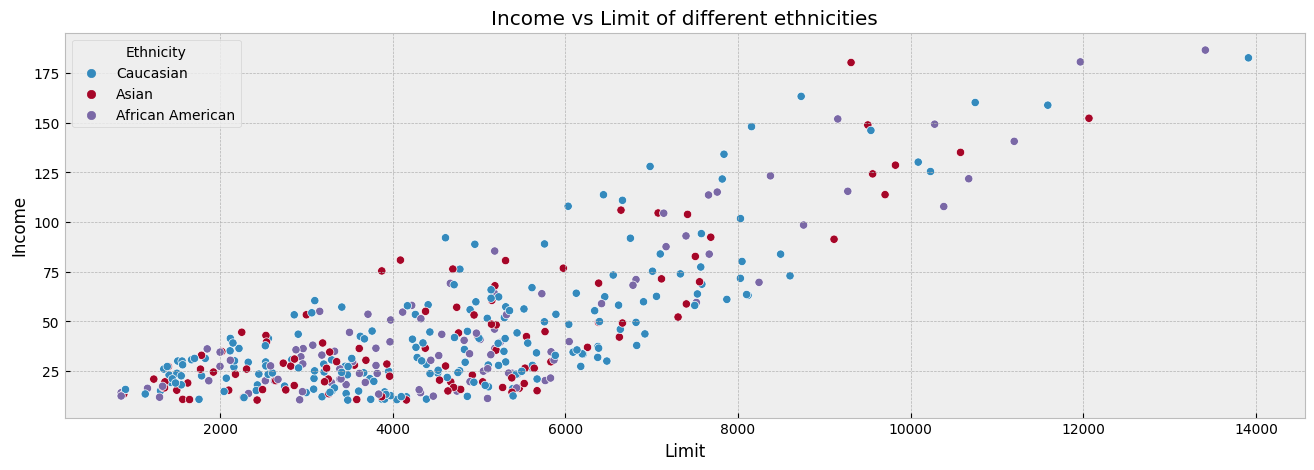

In [ ]:
sns.scatterplot( x="Limit", y='Income',hue='Ethnicity' ,data=df).set(title = "Income vs Limit of different ethnicities")
plt.show()

[Text(0.5, 1.0, 'Balance vs Income of different genders')]

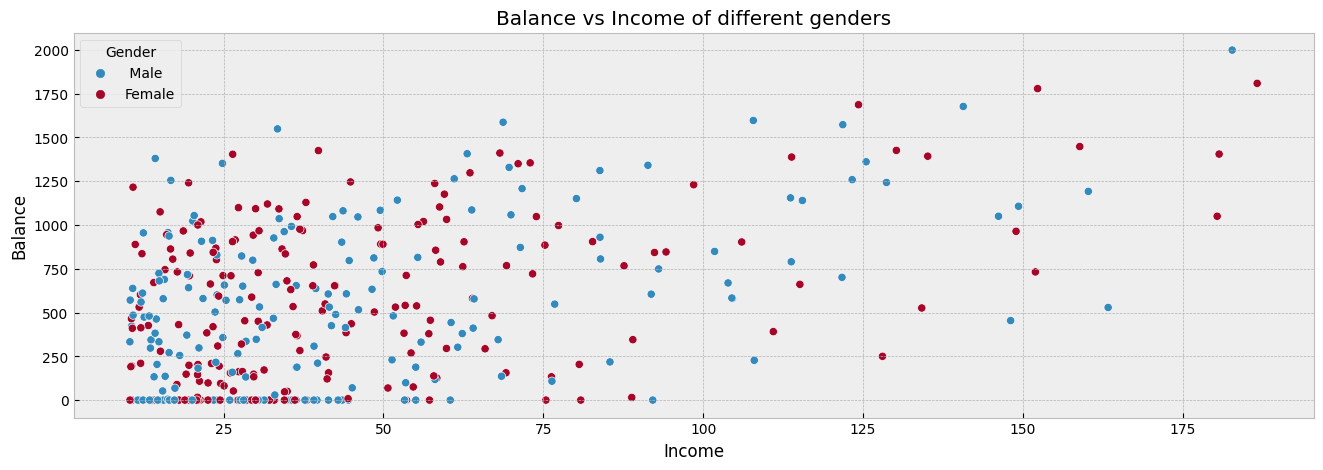

In [ ]:
sns.scatterplot(data=df, x="Income", y="Balance",hue="Gender").set(title = "Balance vs Income of different genders")

[Text(0.5, 1.0, 'Balance vs Limit based on genders')]

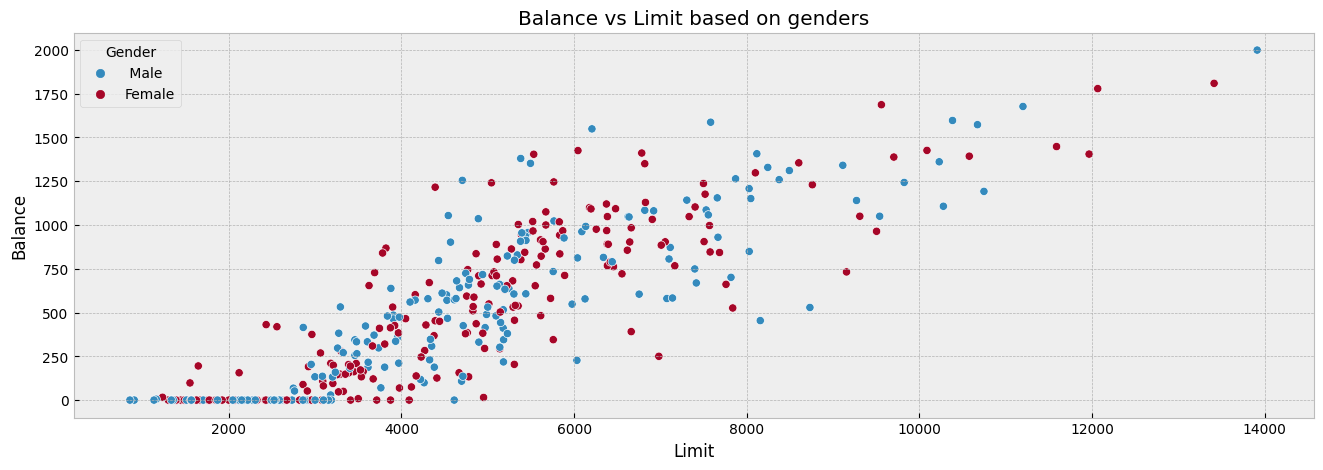

In [ ]:
sns.scatterplot(data=df, x="Limit", y="Balance",hue="Gender").set(title = "Balance vs Limit based on genders")

In [ ]:
df.groupby(['Gender']).sum('Balance')

,Income,Limit,Rating,Cards,Age,Education,Balance
Gender,,,,,,,
Male,8802.791,909641,68229,577,10730,2599,98392
Female,9284.763,984599,73747,606,11537,2781,109614


In [ ]:
df.groupby(['Married']).Balance.sum()

Married
No      81110
Yes    126896
Name: Balance, dtype: int64

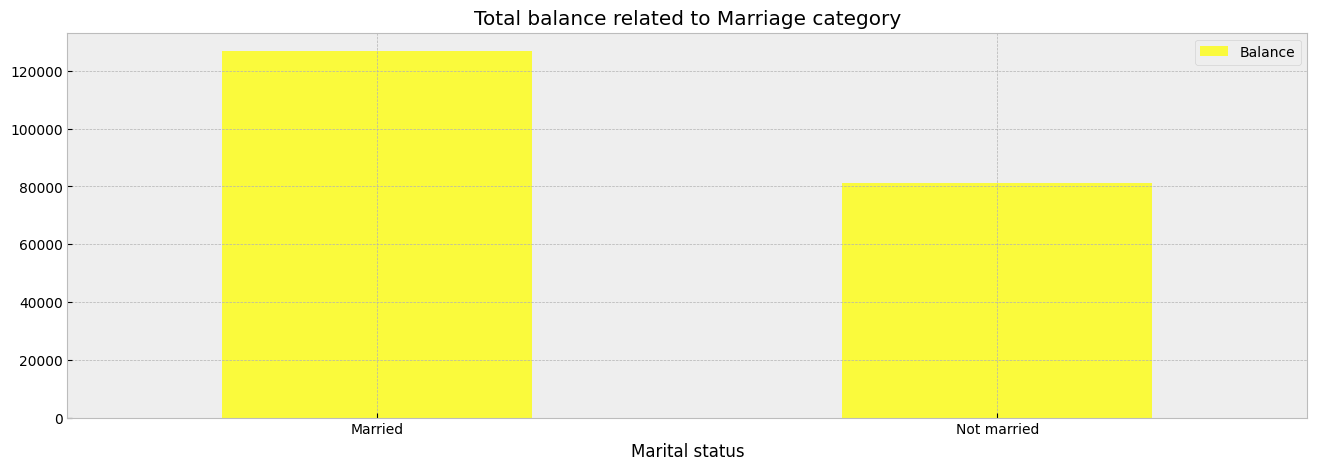

In [ ]:
Married=pd.DataFrame({"Marital status": ['Married', 'Not married'], "Balance": [126896,81110]})
Married.plot(x = "Marital status", y = "Balance", kind = "bar",alpha=0.75, rot=0,color="yellow").set(title="Total balance related to Marriage category")
plt.show()
plt.show()

In [ ]:
df.groupby(['Ethnicity']).Balance.sum()

Ethnicity
African American     52569
Asian                52256
Caucasian           103181
Name: Balance, dtype: int64

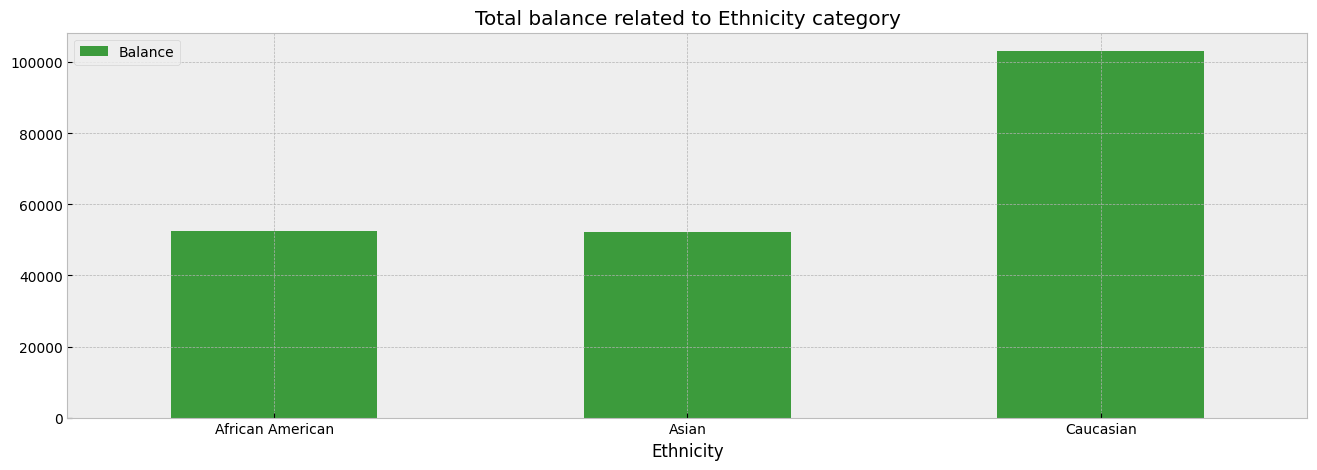

In [ ]:
E=pd.DataFrame({"Ethnicity": ['African American', 'Asian','Caucasian'], "Balance": [52569,52256,103181]})
E.plot(x = "Ethnicity", y = "Balance", kind = "bar",alpha=0.75, rot=0,color='green').set(title="Total balance related to Ethnicity category")
plt.show()
plt.show()

[Text(0.5, 1.0, 'Balance vs Income of whether the person is a Student')]

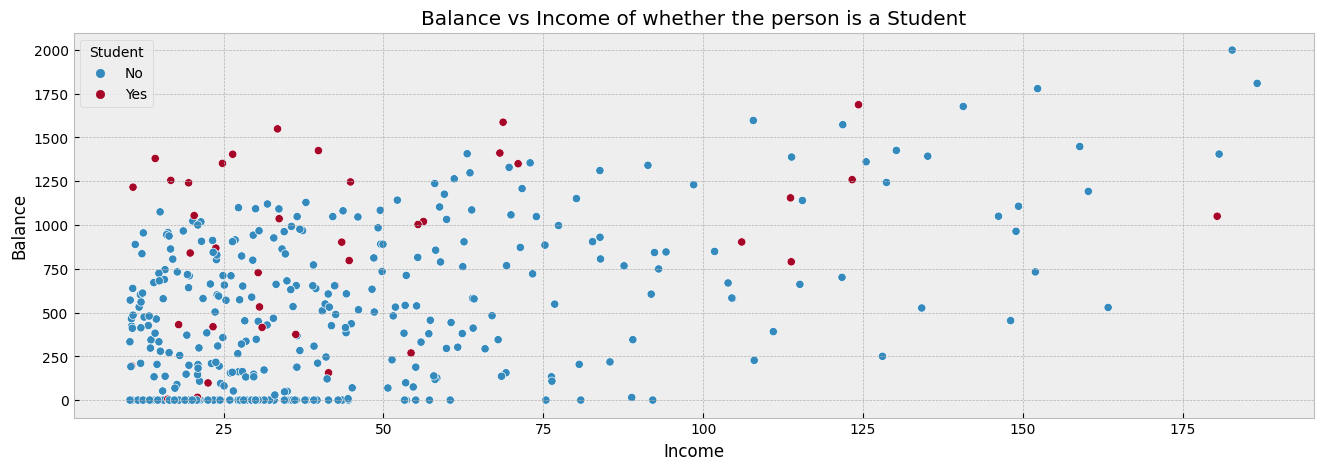

In [ ]:
sns.scatterplot(data=df, x="Income", y="Balance",hue='Student').set(title = "Balance vs Income of whether the person is a Student")

In [ ]:
df.groupby('Student').Balance.sum()

Student
No     172933
Yes     35073
Name: Balance, dtype: int64

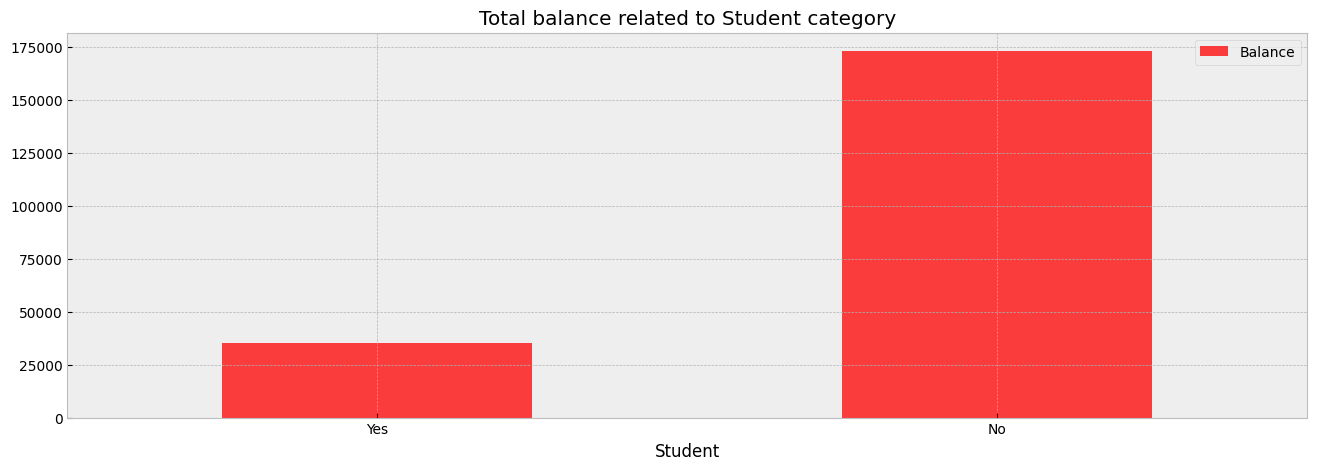

In [ ]:
Student=pd.DataFrame({"Student": ['Yes', 'No'], "Balance": [35073,172933]})
Student.plot(x = "Student", y = "Balance", kind = "bar",alpha=0.75, rot=0,color='red').set(title="Total balance related to Student category")
plt.show()

<Axes: xlabel='Balance'>

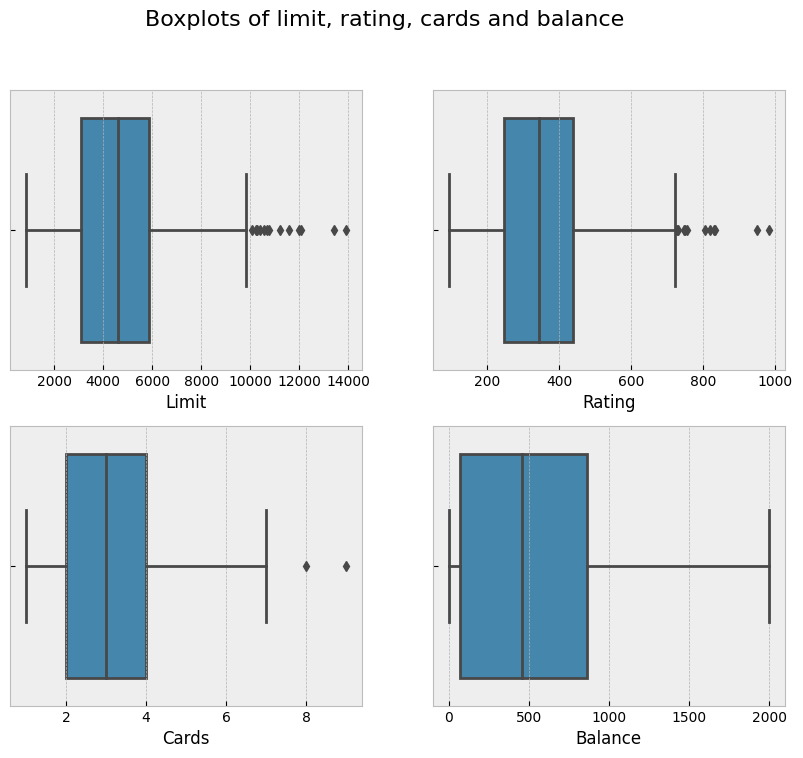

In [ ]:
fig, ax = plt.subplots(2,2,figsize = (10,8))
#fig.tight_layout()
fig.suptitle('Boxplots of limit, rating, cards and balance', fontsize=16)
plt.subplot(2, 2, 1)
sns.boxplot(x=df["Limit"])
plt.subplot(2, 2, 2)
sns.boxplot(x=df["Rating"])
plt.subplot(2, 2, 3)
sns.boxplot(x=df["Cards"])
plt.subplot(2, 2, 4)
sns.boxplot(x=df["Balance"])

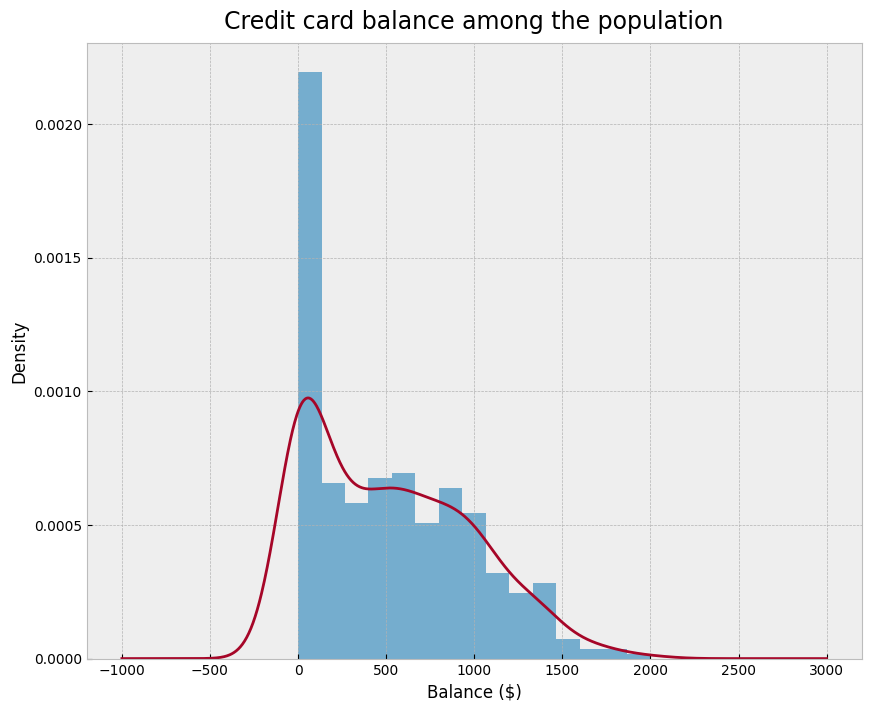

In [ ]:
plt.style.use("bmh")
balance=df['Balance']
fig, ax = plt.subplots(figsize = (10,8))
balance.plot(kind = "hist", density = True, alpha = 0.65, bins = 15) 
balance.plot(kind = "kde")
ax.set_xlabel("Balance ($)")
ax.set_title("Credit card balance among the population", size = 17, pad = 10)
plt.show()

<ipython-input-238-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

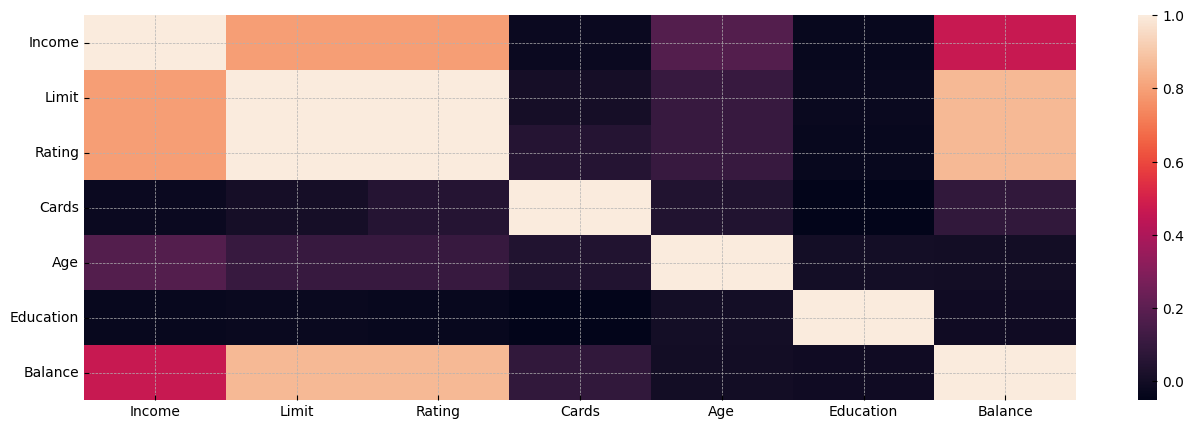

In [ ]:
sns.heatmap(df.corr())

<br>       

###  **Feature generation**

In [ ]:
df['Balance'].value_counts()

0       90
133      3
1048     3
531      3
333      2
        ..
669      1
68       1
642      1
805      1
966      1
Name: Balance, Length: 284, dtype: int64

### Differentiating the non credit card users with active card users.

In [ ]:
df['Active'] = np.where(df['Balance']>0, 'Yes', 'No')  
df.sample(n=3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Active
199,10.403,4159,310,3,43,7,Male,No,Yes,Asian,571,Yes
81,53.480,4263,317,1,83,15,Male,No,No,Caucasian,99,Yes
195,23.883,5384,398,2,73,16,Female,No,Yes,African American,802,Yes


### KMeans Clustering

In [ ]:
features=['Income','Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity','Active']
X=df[features] #feature selection
y=df.Balance #target

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

kmeans_per_k= [KMeans(n_clusters=k, random_state = 42).fit(X_scaled) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in kmeans_per_k[1:]]

silhouette_scores


Choosing the best k value -

<ipython-input-243-51a1798160b8>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  _ = plt.plot(range(2, 10), silhouette_scores, "bo-", color='blue', linewidth=3, markersize=8, label='Silhoutee curve')


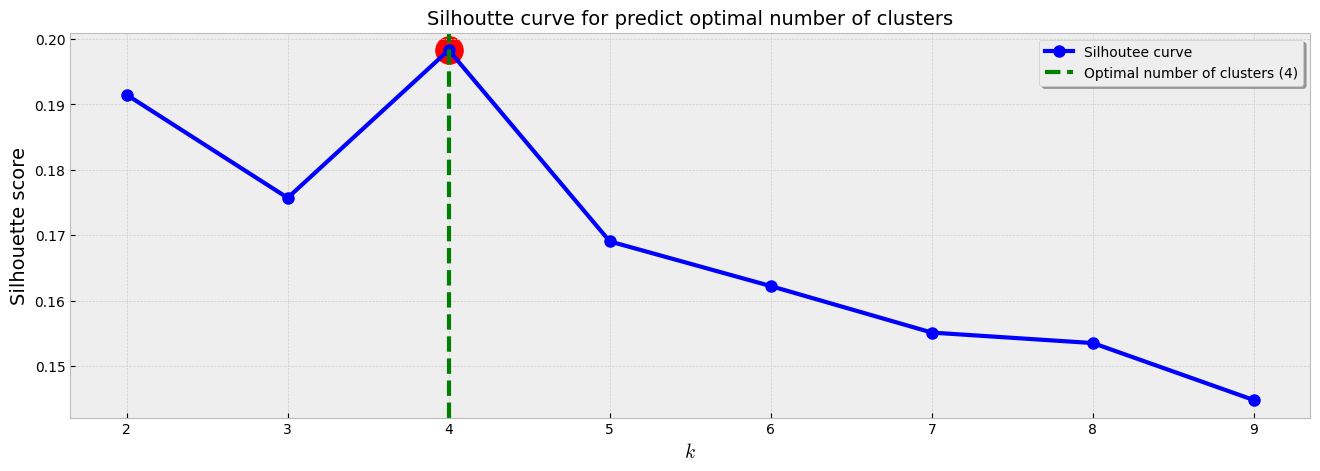

In [ ]:
from pylab import rcParams
rcParams["figure.figsize"]= 16, 5 
_ = plt.plot(range(2, 10), silhouette_scores, "bo-", color='blue', linewidth=3, markersize=8, label='Silhoutee curve')

_ = plt.xlabel("$k$", fontsize=14, family="Arial") 

_ = plt.ylabel("Silhouette score", fontsize=14, family="Arial")

_ = plt.grid(which='major', color='#cccccc', linestyle='--')

_ = plt.title("Silhoutte curve for predict optimal number of clusters", family='Arial', fontsize=14)

#Calculate the optimal number of cluster

k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark optimal number of clusters

_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label="Optimal number of clusters ({})".format(k))

_ =  plt.scatter (k, silhouette_scores[k-2], c='red', s=400)

_ = plt.legend(shadow=True)

_ = plt.show()

In [ ]:

kmeans = KMeans(n_clusters=4,max_iter=100,n_init=100,random_state=36)

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Active,Cluster
0,14.891,3606,283,2,34,11,0,0,0,0,0,1
1,106.025,6645,483,3,82,15,1,1,0,1,0,0
2,104.593,7075,514,4,71,11,0,0,1,1,0,3
3,148.924,9504,681,3,36,11,1,0,1,1,0,3
4,55.882,4897,357,2,68,16,0,0,0,0,0,1


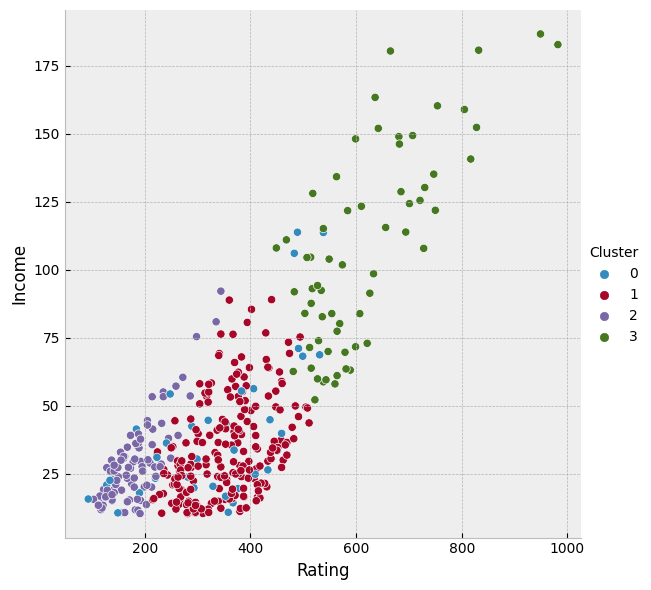

In [ ]:
sns.relplot(
    x="Rating", y="Income", hue="Cluster", data=X, height=6
);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)


Converting **categorical** columns to **numerical**

In [ ]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
X_train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Active,Cluster
3,148.924,9504,681,3,36,11,1,0,1,1,0,3
18,49.570,6384,448,1,28,9,1,0,0,1,0,1
202,21.038,1448,145,2,58,13,1,0,0,0,1,2
250,10.363,2430,191,2,47,18,1,0,0,1,1,2
274,30.550,5869,439,5,81,9,1,0,1,2,0,1


In [ ]:
X_test.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Active,Cluster
209,151.947,9156,642,2,91,11,1,0,0,2,0,3
280,53.401,5319,377,3,35,12,1,0,1,2,0,1
33,31.367,1829,162,4,30,10,0,0,0,0,1,2
210,24.543,3206,243,2,62,12,1,0,0,0,0,1
93,16.479,5435,388,2,26,16,0,0,1,2,0,1


Mutual information score for each feature

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:]  # show a few features with their MI scores

Limit        0.948608
Rating       0.664486
Cluster      0.652784
Active       0.517219
Income       0.086645
Cards        0.073653
Gender       0.034985
Student      0.033780
Education    0.025916
Ethnicity    0.014019
Married      0.000223
Age          0.000000
Name: MI Scores, dtype: float64

In [ ]:
X_train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Active,Cluster
3,148.924,9504,681,3,36,11,1,0,1,1,0,3
18,49.570,6384,448,1,28,9,1,0,0,1,0,1
202,21.038,1448,145,2,58,13,1,0,0,0,1,2
250,10.363,2430,191,2,47,18,1,0,0,1,1,2
274,30.550,5869,439,5,81,9,1,0,1,2,0,1


<br>    

### **Feature Scaling**

In [ ]:
X_train.dtypes

Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender          int64
Student         int64
Married         int64
Ethnicity       int64
Active          int64
Cluster      category
dtype: object

In [ ]:
X_test.dtypes

Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender          int64
Student         int64
Married         int64
Ethnicity       int64
Active          int64
Cluster      category
dtype: object

In [ ]:
X_train['Cluster']=X_train['Cluster'].astype("int")
X_test['Cluster']=X_test['Cluster'].astype("int")

In [ ]:
X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

X_train_scaled.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Active,Cluster
3,2.935816,1.992455,2.031981,0.047240,-1.214019,-0.792791,0.979888,-0.321131,1.230827,0.282596,-0.562034,1.789241
18,0.123060,0.691885,0.582371,-1.392448,-1.686271,-1.423868,0.979888,-0.321131,-0.809923,0.282596,-0.562034,-0.538227
202,-0.684694,-1.365683,-1.302744,-0.672604,0.084673,-0.161714,0.979888,-0.321131,-0.809923,-0.923148,1.773692,0.625507
250,-0.986908,-0.956337,-1.016555,-0.672604,-0.564673,1.415979,0.979888,-0.321131,-0.809923,0.282596,1.773692,0.625507
274,-0.415405,0.477208,0.526378,1.486928,1.442397,-1.423868,0.979888,-0.321131,1.230827,1.488341,-0.562034,-0.538227


In [ ]:

X_test_scaled = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

X_test_scaled.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Active,Cluster
209,3.036820,2.284352,2.212221,-0.806817,2.150122,-0.746141,0.898863,-0.375595,-0.729199,1.599588,-0.437726,1.823308
280,0.233267,0.280824,0.154341,-0.038420,-0.943181,-0.406986,0.898863,-0.375595,1.354226,1.599588,-0.437726,-0.420763
33,-0.393582,-1.541514,-1.515260,0.729977,-1.219369,-1.085296,-1.098610,-0.375595,-0.729199,-0.837879,2.255975,0.701272
210,-0.587720,-0.822500,-0.886247,-0.806817,0.548233,-0.406986,0.898863,-0.375595,-0.729199,-0.837879,-0.437726,-0.420763
93,-0.817134,0.341395,0.239762,-0.806817,-1.440319,0.949634,-1.098610,-0.375595,1.354226,1.599588,-0.437726,-0.420763


<br>

Implementing machine learning models

Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 

model_regression = LinearRegression()
model_regression.fit(X_train,y_train)
preds_regression = model_regression.predict(X_test)
preds_regression

array([ 737.95151193,  505.03070836,  -52.99161757,  117.70915648,
        880.58300381,  122.11949884,  839.10951778,  195.50717076,
         58.39740824, 1389.70191469, 1282.03055123,  375.21471434,
        381.57899885,  628.40632839,  873.44326155,  398.62013383,
        338.85917735,  776.09679788,  691.93942496,  847.46132414,
        152.60222665,  191.62673259,  681.41158247,  421.46719725,
        371.10954538,  470.96945178,  299.44596478, 1025.9714303 ,
        480.19475203,  738.25787295,  563.85774907, 1403.09034422,
       1083.62951309,  157.89159717,  685.60769064,  -67.95320909,
        739.62958361,  246.30621588,  648.65641984,  642.05885126,
        904.13085131, -162.12285355,  538.0168625 ,  641.97944086,
        539.62011491, 1314.0174893 ,  194.44751485,  524.17113595,
        240.7408569 ,  696.58790852, 1207.07489058,   98.88851177,
        579.83849361,  405.55681595,  586.5512807 ,  363.36016024,
        579.16356101,  108.44614956,  852.97634843,  185.32574

In [ ]:
preds_regression = np.rint(preds_regression).astype(int)
preds_regression

array([ 738,  505,  -53,  118,  881,  122,  839,  196,   58, 1390, 1282,
        375,  382,  628,  873,  399,  339,  776,  692,  847,  153,  192,
        681,  421,  371,  471,  299, 1026,  480,  738,  564, 1403, 1084,
        158,  686,  -68,  740,  246,  649,  642,  904, -162,  538,  642,
        540, 1314,  194,  524,  241,  697, 1207,   99,  580,  406,  587,
        363,  579,  108,  853,  185,   88,   28,  127,  430,  431,  235,
        612, -188,  723,  594,   72, 1377, 1158, 1051, 1076,  213,  498,
       1245,  246,  496])

In [ ]:
print('Linear Regression Model:\n\nR2 score: ',r2_score(y_test, preds_regression))
print('\nMean Absolute Error: ',mean_absolute_error(y_test, preds_regression))
print('\nMean Squared Error: ',mean_squared_error(y_test, preds_regression))

Linear Regression Model:

R2 score:  0.9663214294715077

Mean Absolute Error:  46.975

Mean Squared Error:  5626.8


Decision tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
preds_dt=model_dt.predict(X_test)
preds_dt

array([ 964.,  538.,    0.,  108.,  955.,    0.,  843.,    0.,  218.,
       1003., 1020.,  538.,  331.,  711.,  967.,  414.,  580.,  749.,
        717.,  844.,  209.,    0.,  872.,  230.,  423.,  426.,  210.,
        966.,  474.,  836.,  611., 1361.,  964.,  218.,  805.,    0.,
        885.,  210.,  607.,  806., 1259.,    0.,  269.,  602.,  642.,
       1549.,    0.,  654.,    0.,  611., 1216.,   29.,  631.,  611.,
        651.,  210.,  429.,  156.,  926.,  419.,    0.,    0.,   75.,
        526.,   16.,    0.,  526.,    0.,  712.,  638.,   16., 1003.,
       1264.,  905.,  992.,  148.,  578., 1264.,    0.,  531.])

In [ ]:
preds_dt = np.rint(preds_dt).astype(int)
preds_dt

array([ 964,  538,    0,  108,  955,    0,  843,    0,  218, 1003, 1020,
        538,  331,  711,  967,  414,  580,  749,  717,  844,  209,    0,
        872,  230,  423,  426,  210,  966,  474,  836,  611, 1361,  964,
        218,  805,    0,  885,  210,  607,  806, 1259,    0,  269,  602,
        642, 1549,    0,  654,    0,  611, 1216,   29,  631,  611,  651,
        210,  429,  156,  926,  419,    0,    0,   75,  526,   16,    0,
        526,    0,  712,  638,   16, 1003, 1264,  905,  992,  148,  578,
       1264,    0,  531])

In [ ]:
print('Decision tree Model:\n\nR2 score: ',r2_score(y_test, preds_dt))
print('\nMean Absolute Error: ',mean_absolute_error(y_test,preds_dt))
print('\nMean Squared Error: ',mean_squared_error(y_test,preds_dt))

Decision tree Model:

R2 score:  0.8757073973525268

Mean Absolute Error:  96.8625

Mean Squared Error:  20766.0125


Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train,y_train)
preds_randomforest=regr.predict(X_test)
preds_randomforest

array([ 994.64,  509.85,    0.  ,  154.78,  868.49,    0.  ,  829.53,
          0.  ,  260.31, 1099.25, 1156.9 ,  464.44,  367.7 ,  658.59,
        923.43,  433.76,  648.05,  791.53,  685.16,  864.68,  143.  ,
          0.  ,  897.34,  384.6 ,  331.07,  434.14,  199.  ,  935.63,
        464.93,  723.22,  536.6 , 1498.7 ,  938.24,  263.11,  687.04,
          0.  ,  923.52,  216.02,  739.16,  687.26,  835.71,    0.  ,
        293.69,  546.81,  529.14, 1239.89,    0.  ,  570.69,    0.  ,
        572.92, 1092.95,  128.18,  592.06,  379.11,  645.81,  222.81,
        517.1 ,  169.62,  922.86,  240.77,    0.  ,    0.  ,  154.9 ,
        573.06,  220.57,    0.  ,  694.63,    0.  ,  753.41,  536.63,
        158.38, 1103.09, 1103.07, 1044.05, 1024.31,  175.28,  589.35,
       1268.09,    0.  ,  494.92])

In [ ]:
preds_randomforest=np.rint(preds_randomforest).astype(int)
preds_randomforest

array([ 995,  510,    0,  155,  868,    0,  830,    0,  260, 1099, 1157,
        464,  368,  659,  923,  434,  648,  792,  685,  865,  143,    0,
        897,  385,  331,  434,  199,  936,  465,  723,  537, 1499,  938,
        263,  687,    0,  924,  216,  739,  687,  836,    0,  294,  547,
        529, 1240,    0,  571,    0,  573, 1093,  128,  592,  379,  646,
        223,  517,  170,  923,  241,    0,    0,  155,  573,  221,    0,
        695,    0,  753,  537,  158, 1103, 1103, 1044, 1024,  175,  589,
       1268,    0,  495])

In [ ]:
print('Random forest mdoel:\n\nR2 score: ',r2_score(y_test, preds_randomforest))
print('\nMean Absolute Error: ',mean_absolute_error(y_test,preds_randomforest))
print('\nMean Squared Error: ',mean_squared_error(y_test,preds_randomforest))

Random forest mdoel:

R2 score:  0.925165764987578

Mean Absolute Error:  73.85

Mean Squared Error:  12502.825


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(n_estimators=3700, learning_rate=0.00095)
model_xgb.fit(X_train, y_train)
preds_xgb = model_xgb.predict(X_test)
preds_xgb

array([7.66039551e+02, 5.16388489e+02, 1.55391945e-02, 1.01249855e+02,
       8.84028564e+02, 1.55391945e-02, 8.54817932e+02, 1.55391945e-02,
       1.94486755e+02, 1.04564441e+03, 1.14811072e+03, 4.43917755e+02,
       3.43393341e+02, 6.62075623e+02, 8.42907349e+02, 4.16022247e+02,
       5.92422791e+02, 7.70036499e+02, 6.24337341e+02, 8.41213257e+02,
       1.21748596e+02, 1.55391945e-02, 9.20747070e+02, 2.53740845e+02,
       3.51418427e+02, 4.07759308e+02, 1.74150482e+02, 9.35494507e+02,
       4.59928589e+02, 7.20692444e+02, 5.30194824e+02, 1.37892517e+03,
       9.38679199e+02, 2.16306137e+02, 6.89498474e+02, 1.55391945e-02,
       9.32977112e+02, 2.22208649e+02, 6.84687805e+02, 7.26788940e+02,
       1.02664819e+03, 1.55391945e-02, 3.82312286e+02, 5.58121521e+02,
       4.77479797e+02, 1.22755139e+03, 1.55391945e-02, 5.08961212e+02,
       1.55391945e-02, 6.23942810e+02, 1.09401282e+03, 1.02513390e+02,
       5.32730713e+02, 3.97147919e+02, 6.11429688e+02, 2.46800797e+02,
      

In [ ]:
preds_xgb=np.rint(preds_xgb).astype(int)
preds_xgb

array([ 766,  516,    0,  101,  884,    0,  855,    0,  194, 1046, 1148,
        444,  343,  662,  843,  416,  592,  770,  624,  841,  122,    0,
        921,  254,  351,  408,  174,  935,  460,  721,  530, 1379,  939,
        216,  689,    0,  933,  222,  685,  727, 1027,    0,  382,  558,
        477, 1228,    0,  509,    0,  624, 1094,  103,  533,  397,  611,
        247,  457,  152,  889,  353,    0,    0,   99,  616,  250,    0,
        639,    0,  697,  478,   30, 1027, 1164, 1034,  978,  159,  577,
       1252,    0,  450])

In [ ]:
print('XGBoost mdoel:\n\nR2 score: ',r2_score(y_test, preds_xgb))
print('\nMean Absolute Error: ',mean_absolute_error(y_test,preds_xgb))
print('\nMean Squared Error: ',mean_squared_error(y_test,preds_xgb))

XGBoost mdoel:

R2 score:  0.9251295534016504

Mean Absolute Error:  72.975

Mean Squared Error:  12508.875


In [ ]:
models= ['LinearRegression','DecisionTree','RandomForest','XGBoost']
r2scores=[r2_score(y_test,preds_regression),r2_score(y_test,preds_dt),r2_score(y_test,preds_randomforest),r2_score(y_test,preds_xgb)]
mean_abs_error=[mean_absolute_error(y_test,preds_regression),mean_absolute_error(y_test,preds_dt),mean_absolute_error(y_test,preds_randomforest),mean_absolute_error(y_test,preds_xgb)]
mean_square_error=[ mean_squared_error(y_test,preds_regression), mean_squared_error(y_test,preds_dt),mean_squared_error(y_test,preds_randomforest) ,mean_squared_error(y_test,preds_xgb)]
df2 = pd.DataFrame(list(zip(models,r2scores,mean_abs_error,mean_square_error)),
               columns =['models','r2scores','mean_absolute_error','mean_squared_error'])
df2.head()

,models,r2scores,mean_absolute_error,mean_squared_error
0,LinearRegression,0.966321,46.9750,5626.8000
1,DecisionTree,0.875707,96.8625,20766.0125
2,RandomForest,0.925166,73.8500,12502.8250
3,XGBoost,0.925130,72.9750,12508.8750
